In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
soc=pd.read_csv("../Datasets/Social_Network_Ads.csv")
soc

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
gen=pd.get_dummies(soc.Gender,drop_first=True)
soc1=pd.concat([soc['Age'],soc['EstimatedSalary'],gen,soc['Purchased']],axis=1)
soc1

,Age,EstimatedSalary,Male,Purchased
0,19,19000,1,0
1,35,20000,1,0
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,1,0
...,...,...,...,...
395,46,41000,0,1
396,51,23000,1,1
397,50,20000,0,1
398,36,33000,1,0


In [7]:
gen10=pd.get_dummies(soc.Gender)
gen10

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [10]:
X=soc1.iloc[:,:-1].values
y=soc1.iloc[:,3].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [11]:
X

array([[   19, 19000,     1],
       [   35, 20000,     1],
       [   26, 43000,     0],
       ...,
       [   50, 20000,     0],
       [   36, 33000,     1],
       [   49, 36000,     0]], dtype=int64)

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
# random_state not provided means its randomly taking the Dataset and generating the output 
# random state is given in order to maintain the integrity and supressing the too much randomness of data to generate the random sequence as depicted

In [48]:
from sklearn.preprocessing import StandardScaler 
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [49]:
len(X_test)

100

In [50]:
X_train

array([[-6.69736544e-01, -1.60201945e+00, -1.01342342e+00],
       [ 1.43328832e-02,  2.78434919e-02,  9.86754382e-01],
       [-5.72012340e-01, -1.51470536e+00,  9.86754382e-01],
       [ 5.02953903e-01,  1.71591582e+00,  9.86754382e-01],
       [-1.64697858e+00,  5.22623313e-01,  9.86754382e-01],
       [-8.65184952e-01,  2.89785750e-01,  9.86754382e-01],
       [ 1.43328832e-02, -2.63203462e-01,  9.86754382e-01],
       [ 1.12057087e-01,  1.44262273e-01, -1.01342342e+00],
       [-5.72012340e-01,  2.32711442e+00, -1.01342342e+00],
       [ 1.08929913e+00, -1.22365841e+00,  9.86754382e-01],
       [-1.15835756e+00,  5.69481872e-02, -1.01342342e+00],
       [-2.78839729e-01, -3.79622243e-01, -1.01342342e+00],
       [-1.06063336e+00, -3.50517548e-01,  9.86754382e-01],
       [ 9.91574923e-01, -1.07813493e+00,  9.86754382e-01],
       [ 1.08929913e+00,  2.06517217e+00, -1.01342342e+00],
       [-8.65184952e-01,  3.77099836e-01, -1.01342342e+00],
       [ 1.38247174e+00,  1.97785808e+00

In [51]:
from sklearn.naive_bayes import GaussianNB
cf=GaussianNB()
cf.fit(X_train,y_train)
pred=cf.predict(X_test)

In [61]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,pred))

0.91


In [62]:
pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [63]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[63,  3],
       [ 6, 28]], dtype=int64)

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        66
           1       0.90      0.82      0.86        34

    accuracy                           0.91       100
   macro avg       0.91      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



In [57]:
cf.predict_proba(X_test)

array([[9.89363217e-01, 1.06367828e-02],
       [7.71242239e-02, 9.22875776e-01],
       [9.74670336e-01, 2.53296636e-02],
       [9.24558821e-01, 7.54411788e-02],
       [9.87152088e-01, 1.28479116e-02],
       [8.14121540e-01, 1.85878460e-01],
       [8.71833560e-01, 1.28166440e-01],
       [5.86917548e-04, 9.99413082e-01],
       [7.78412868e-01, 2.21587132e-01],
       [9.89559541e-01, 1.04404591e-02],
       [9.68457760e-01, 3.15422399e-02],
       [8.99658844e-01, 1.00341156e-01],
       [3.38012546e-01, 6.61987454e-01],
       [9.32352467e-01, 6.76475334e-02],
       [9.85262628e-01, 1.47373722e-02],
       [8.34056593e-01, 1.65943407e-01],
       [3.04630230e-01, 6.95369770e-01],
       [5.88402815e-01, 4.11597185e-01],
       [5.39879661e-03, 9.94601203e-01],
       [9.83993653e-01, 1.60063468e-02],
       [7.57794548e-01, 2.42205452e-01],
       [5.65303307e-03, 9.94346967e-01],
       [4.91270723e-01, 5.08729277e-01],
       [2.51964046e-02, 9.74803595e-01],
       [9.865211

In [60]:
y_predictProb = cf.predict_proba(X_test)
from sklearn.metrics import auc,roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_predictProb[::,1])
# output we want in order of list 
roc_auc = auc(fpr,tpr)
roc_auc

0.9594474153297683

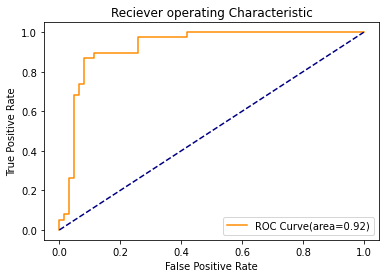

In [58]:
plt.plot(fpr,tpr,color="darkorange",label='ROC Curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [66]:
# Iris Dataset

In [69]:
from sklearn.datasets import load_iris
iris_data= load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [70]:
dir(iris_data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [71]:
iris=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)

In [77]:
iris['Species']=pd.Series(iris_data.target)
iris['Names']=iris['Species'].apply(lambda x:iris_data.target_names[x])
iris
# the names have been created according to the Target name of the Variable 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [78]:
iris['Names'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Names, dtype: int64

In [80]:
X=iris.drop(['Species','Names'],axis=1)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [81]:
y=iris['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [83]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [106]:
from sklearn.naive_bayes import GaussianNB
cf2=GaussianNB()
cf2.fit(X_train,y_train)
y_pred=cf2.predict(X_test)
y_pred

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

In [107]:
cf2.score(X_test,y_test)

0.9210526315789473

In [109]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

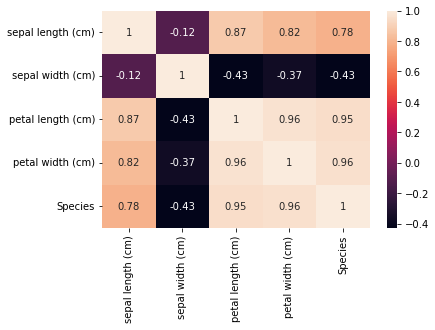

In [110]:
sns.heatmap(iris.corr(),annot=True)

In [91]:
cf2.predict_proba(X_test)

array([[4.98983163e-068, 9.99976886e-001, 2.31140535e-005],
       [2.38605399e-151, 6.05788555e-001, 3.94211445e-001],
       [1.52930285e-229, 6.40965644e-007, 9.99999359e-001],
       [1.00000000e+000, 3.59116140e-019, 4.35301434e-027],
       [2.95380506e-300, 1.34947916e-012, 1.00000000e+000],
       [2.16647395e-038, 9.99999791e-001, 2.08857492e-007],
       [1.00000000e+000, 1.05055556e-017, 6.59080633e-026],
       [9.55629438e-147, 1.08807974e-001, 8.91192026e-001],
       [1.00000000e+000, 2.52482409e-016, 1.46364748e-024],
       [6.02158895e-108, 9.90558853e-001, 9.44114652e-003],
       [2.10951969e-108, 9.88848490e-001, 1.11515105e-002],
       [1.45542701e-135, 7.56061808e-001, 2.43938192e-001],
       [8.96514127e-239, 1.55965373e-007, 9.99999844e-001],
       [5.55336438e-231, 1.60582831e-006, 9.99998394e-001],
       [1.00000000e+000, 3.60824506e-014, 6.21633393e-022],
       [1.00000000e+000, 1.29808311e-010, 2.24314344e-018],
       [3.09565382e-153, 1.07603601e-001

In [111]:
from sklearn.metrics import confusion_matrix
cf2=confusion_matrix(y_test,y_pred)
cf2

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  2, 10]], dtype=int64)

<AxesSubplot:>

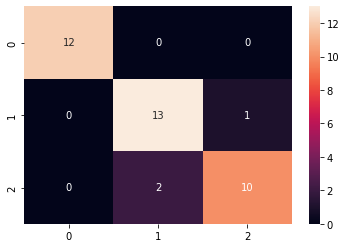

In [112]:
sns.heatmap(cf2,annot=True)